Import the necessary libraries

In [116]:
import pandas as pd
import numpy as np
import copy as copy
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import zscore
%matplotlib inline

In [71]:
#read the car dataset
car_df = pd.read_csv('car-mpg.csv')

In [72]:
#take the copy of the car dataset
car_copy_df = copy.deepcopy(car_df)

In [73]:
#print first five records
car_copy_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [74]:
#display the datatype for each attribute
car_copy_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

In [75]:
#display the five point summary for the car dataset
car_copy_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [76]:
#check for the null the values in the columns
car_copy_df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [77]:
#attribute 'hp' need be a numerical but it is displayed as object
#check for the values other than numeric

car_copy_df[~car_copy_df['hp'].str.isdigit()]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [78]:
#Before imputing the '?', this should be updated to nan for better processing
car_copy_df['hp'] = car_copy_df['hp'].replace({'?':np.nan})

#change the datatype from object to float32 so it can be processed 
car_copy_df['hp'] = car_copy_df['hp'].astype('float32')

#drop the car name as it will not provide any useful info in prediction
car_copy_df.drop('car_name', axis=1, inplace=True)

In [79]:
#the above records could be dropped or imputed with median. 
#lets impute the value with median as mean is susceptible to outliers.
cols = car_copy_df.columns
simpleimputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
car_copy_df= simpleimputer.fit_transform(car_copy_df)

In [80]:
car_copy_df = pd.DataFrame(car_copy_df, columns = cols)
car_copy_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,1.0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,1.0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,1.0
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,1.0


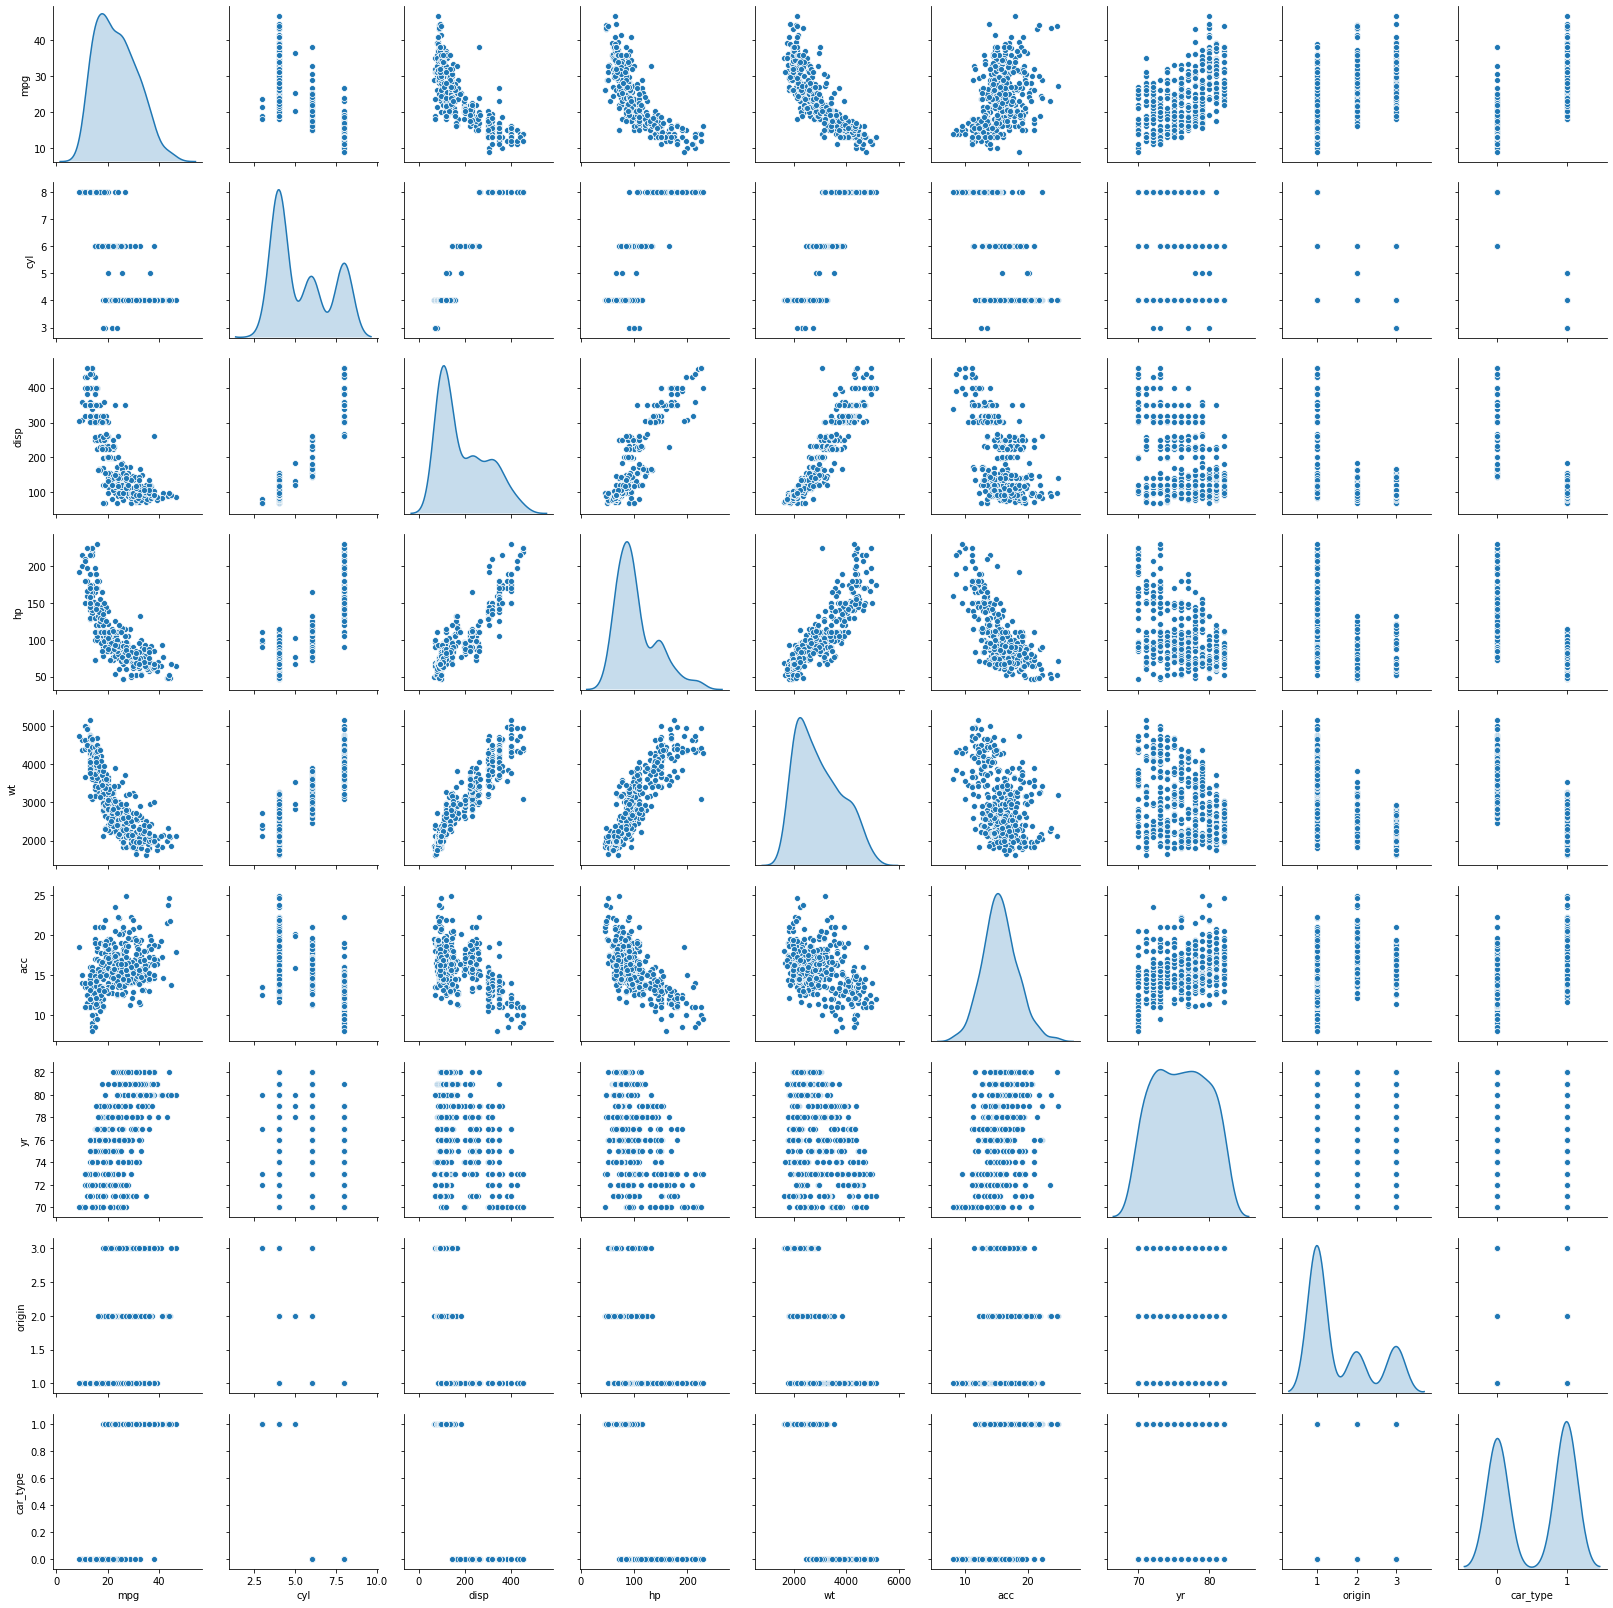

In [82]:
#create a pairplot to understand the correlation between the independent vars
sns.pairplot(car_copy_df, diag_kind='kde')

In [87]:
#origin looks like a binomial use pd dummies to convert
#replace the origin value with meaningful country names
car_copy_df['origin'] = car_copy_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [89]:
car_copy_df = pd.get_dummies(car_copy_df,drop_first=True)

In [91]:
#separate the dependent and independent variables
X = car_copy_df.drop('mpg',axis=1)
y = car_copy_df['mpg']

In [96]:
#scale the data using zscore
X_scaled = X.apply(zscore)

In [97]:
#use the train and test split to segregate the data
train_x, test_x, train_y, test_y = train_test_split(X_scaled,y,test_size=0.25,random_state=100)

In [109]:
#apply the linear regression
linearregression = LinearRegression()
linearregression.fit(train_x, train_y)
print(linearregression.coef_)

[ 2.05534406  2.30625297 -1.43742739 -5.40898453  0.21523889  2.80021557
  2.77011103  0.9477297   0.650409  ]


In [111]:
#apply ridge
ridge = Ridge(alpha = 0.3)
ridge.fit(train_x, train_y)
ridge.coef_

array([ 2.02622393,  2.22826437, -1.43191587, -5.34307582,  0.20554988,
        2.79251178,  2.74177707,  0.9442259 ,  0.64265208])

In [112]:
#apply lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(train_x, train_y)
lasso.coef_

array([ 0.55997408,  0.        , -0.53168978, -4.06071187,  0.        ,
        2.61452802,  1.47008892,  0.61404666,  0.26298963])

In [114]:
#compare the score of all three models
print('train score of linear:', linearregression.score(train_x, train_y))
print('test score of linear:', linearregression.score(test_x, test_y))
print('\ntrain score of ridge:', ridge.score(train_x, train_y))
print('test score of ridge:', ridge.score(test_x, test_y))
print('\ntrain score of lasso:', lasso.score(train_x, train_y))
print('test score of lasso:', lasso.score(test_x, test_y))

train score of linear: 0.8364390300209502
test score of linear: 0.8527905927176951

train score of ridge: 0.8364270604502476
test score of ridge: 0.8528379556786436

train score of lasso: 0.8231078493180912
test score of lasso: 0.8426374669408233


Generate polynomial model reflecting some non-linear interactions between the features.

In [117]:
polynomialfeatures = PolynomialFeatures(degree=2, interaction_only = True)

In [121]:
X_poly = polynomialfeatures.fit_transform(X_scaled)

In [122]:
train_x, test_x, train_y, test_y = train_test_split(X_poly, y, test_size = 0.25, random_state = 100)

In [123]:
train_x.shape

(298, 46)

In [125]:
#we have now 46 features and let's repeat the process to see the diff
linearregression.fit(train_x, train_y)
linearregression.coef_

array([ 4.75169629e-13,  7.01868320e+00, -6.25729350e+00, -1.32813905e+00,
       -2.65856249e+00, -9.42548856e-01,  2.68799245e+00,  4.26589519e+00,
        9.09579809e-02, -1.31523298e+00, -6.60142943e-01,  1.09524214e-01,
        5.06726152e-01,  2.45198735e+00, -4.96944682e-01,  3.60491089e+00,
        9.79479639e+00, -2.59790230e+00, -3.82542894e-01,  2.01768076e+00,
       -1.27393769e+00,  2.54014094e+00, -1.60014208e+00, -7.72445567e+00,
       -1.17335765e+00, -7.36764550e-01, -4.47848830e-01, -8.92136263e-01,
        1.16710298e-01, -1.08366784e+00, -9.60567507e-02,  3.62914224e-01,
       -8.43317225e-01, -3.04420292e-01,  4.17669420e+00,  6.14892060e-01,
        7.87478565e-01,  7.96136551e-01, -4.39577927e-01,  9.97110440e-01,
        7.04719400e-01,  3.40429285e-01,  3.45007563e-01,  5.65046192e+00,
       -1.44743329e+00,  6.12497251e-01])

In [126]:
ridge.fit(train_x, train_y)
ridge.coef_

array([ 0.        ,  4.64522352, -4.10129357, -1.33870353, -3.42324819,
       -0.72641708,  2.67143793,  2.66408334,  0.74621601, -1.06344589,
       -1.08373483, -0.2814727 ,  0.48263132,  2.03189339, -0.34211991,
        2.31585344,  6.37183637, -1.89851884, -0.16014046,  2.00824783,
       -1.01091011,  2.1738679 , -2.11281739, -3.42556289, -0.69445233,
       -0.67067375, -0.33294955, -0.95126145, -0.08119272, -1.02973981,
       -0.05830378,  0.28621114, -0.69874821, -0.1281111 ,  2.3992672 ,
        0.39739025,  0.73629528,  0.62321509, -0.01147596,  1.03766912,
        0.63561915,  0.33798311,  0.34104429,  3.74998214, -1.04159976,
        0.1844887 ])

In [127]:
lasso.fit(train_x, train_y)
lasso.coef_

array([ 0.        , -0.        , -0.12219987, -1.54930163, -4.80063674,
        0.        ,  2.56734851,  0.39922805,  0.        ,  0.02832055,
       -0.        , -0.        ,  0.        ,  0.22230053, -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  1.24507134,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.08935992, -0.37308057, -0.        , -0.14804361,
       -0.        ,  0.        , -0.29041145, -0.        , -0.        ,
       -0.        ,  0.50442141, -0.        ,  0.50192673,  0.73215349,
        0.        ,  0.17666724,  0.09348342,  0.        ,  0.        ,
       -0.        ])

#the unimportant features have been zeroed out and for the same reason lasson can be used for feature selection

In [128]:
#compare the score of all three models
print('train score of linear:', linearregression.score(train_x, train_y))
print('test score of linear:', linearregression.score(test_x, test_y))
print('\ntrain score of ridge:', ridge.score(train_x, train_y))
print('test score of ridge:', ridge.score(test_x, test_y))
print('\ntrain score of lasso:', lasso.score(train_x, train_y))
print('test score of lasso:', lasso.score(test_x, test_y))

train score of linear: 0.9084652883572555
test score of linear: 0.8799058814182668

train score of ridge: 0.9071803208057245
test score of ridge: 0.8858266563655081

train score of lasso: 0.8842172403635846
test score of lasso: 0.8837493871073091


Inference: The test score of both lasso and ridge are same. Lasso performs with less features however.